In [1]:
import sys
#!{sys.executable} -m pip install matplotlib
#!{sys.executable} -m pip install seaborn
#!{sys.executable} -m pip install pandas


In [2]:
#import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
pd.set_option("display.precision", 2)
pd.set_option('display.float_format', '{:.2f}'.format)
%matplotlib inline
plt.figure(figsize=(21,34))


<Figure size 1512x2448 with 0 Axes>

<Figure size 1512x2448 with 0 Axes>

In [3]:
#### Primeiro .csv Lista dos HTMLs ##########################

dfNorma = pd.read_csv("listadosHTMs_lower.csv", sep=';', header = None, names = ['norma','contagem'], 
                    dtype={'norma': str, 'contagem': int}, index_col='norma')
dfNorma.drop_duplicates()
print ("quantidade de .htmls no CCIVIL_03 :", dfNorma.count()[0])
print ("lembrando que foi feito tratamento para tirar o maximo possivel de .htmls que nao sao normas")

quantidade de .htmls no CCIVIL_03 : 67171
lembrando que foi feito tratamento para tirar o maximo possivel de .htmls que nao sao normas


In [4]:
print(dfNorma.loc['constituicao'])
print ("=============================================")
print ("a Constituicao está inclusa neste banco!")

contagem    1
Name: constituicao, dtype: int64
a Constituicao está inclusa neste banco!


In [5]:
#### Segundo .csv Lista dos Arquivos que possuem Strike ##########################
df_chunk_Strikes = pd.read_csv("listaDosArquivosComStrike_lower.csv",  sep=';',header = None, chunksize=1000000, names = ['norma','strikes'], dtype={'norma':str, 'strikes': int }) 
chunk_list = []  
index = 1 
ave_bytes = 1 
for chunk in df_chunk_Strikes:  
    chunk_filter = chunk.groupby(['norma'])[['strikes']].agg('sum')  
    chunk_list.append(chunk_filter)
    ave_bytes += chunk.memory_usage().sum()
    index += 1
    
print("Total number of chunks:",index)
ave_bytes = ave_bytes / index
print("Average kbytes per loop:",ave_bytes/1024, "K")
df_normaStrikes = pd.concat(chunk_list)

Total number of chunks: 86
Average kbytes per loop: 15267.836675599565 K


In [6]:
df_normaStrikes = df_normaStrikes.groupby(['norma'])[['strikes']].agg('sum')

In [155]:
df_normaStrikes['strikes'].sum()

84033472

In [111]:
dfEstimativaNos['nosEstimados'].sum()

23836840

In [8]:
#### Terceiro .csv Lista Estivametivas de Nos #########################
dfEstimativaNos = pd.read_csv("estimativaDeNos2_lower.csv",  sep=';',header = None, encoding = 'unicode_escape', names = ['norma','nosEstimados'], index_col='norma') 
dfEstimativaNos = dfEstimativaNos.groupby(['norma']).agg('sum') 
dfEstimativaNos.info()


<class 'pandas.core.frame.DataFrame'>
Index: 69096 entries, 0009 to williamfreire_rev84
Data columns (total 1 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   nosEstimados  69096 non-null  int64
dtypes: int64(1)
memory usage: 1.1+ MB


In [9]:
#### Quarto  .csv Lista listaDoscompilados_lower de Nos ##########################
    
dfCompilados = pd.read_csv(
    "listadosCompilados_lower3.csv", 
    sep=';', 
    header = None, 
    names = ['norma','compilado'],
    dtype = {'norma' : str , 'compilado' : bool},
    index_col='norma'
)
dfCompilados = dfCompilados[dfCompilados['compilado']==True]

In [10]:
print ("total de normas compiladas em todo o site de Normas do Planalto: ",dfCompilados.count()[0])

total de normas compiladas em todo o site de Normas do Planalto:  413


In [12]:
#### Quinto  .csv Lista acessosNormasLegis_jan-jun2020_lower  ##########################
dfacessosNormasLegis  = pd.read_csv("acessosNormasLegis_jan-jun2020_lower.csv" , sep=';', names = ['norma','acessosK'], index_col='norma')
dfacessosNormasLegis = dfacessosNormasLegis.groupby(['norma']).agg('sum') 

In [13]:
dfacessosNormasLegis.describe()

acessosK
count    1108.00
mean    78034.34
std    399323.37
min         0.00
25%      3646.25
50%     13292.50
75%     34657.25
max   6688166.00

In [14]:
#### Sexto  .csv original com as datas   ##########################
headers = ['norma','dt_last_modified','hr_last_modified','tamanhoK']
dtypes = [str, object, object, float]
dfhorariosDatas = pd.read_csv("original2.csv", sep=';', 
                              header = None, 
                              encoding = 'iso-8859-1',
                              names = headers,
                              dtype = {'norma': 'str', 'tamanho': 'float'},
                              parse_dates = ['dt_last_modified','hr_last_modified'],
                              index_col='norma'                       
                              
                             )
dfhorariosDatas = dfhorariosDatas.groupby(['norma'], sort=False)['dt_last_modified','hr_last_modified','tamanhoK'].max()

/snap/jupyter/6/lib/python3.7/site-packages/ipykernel_launcher.py:13: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  del sys.path[0]


In [48]:
#### Setimo  .csv extracao metadados PR   ##########################
headers = ['dataPublicacaoDOU','dataAssinatura','cod_situacao_ato','cod_assinante','cod_orig','norma','tipo','identificacao','assunto2','assunto3','status','assunto','tipo3','col13','col14']
df_chunk_Metadados = pd.read_csv("extracao5.csv", sep=';', 
                              encoding = 'iso-8859-1',
                              index_col='norma',
                              header=0,    
                              names = headers,
                              na_values = {"norma": "_Nao Identificada"},
                              parse_dates = ['dataPublicacaoDOU','dataAssinatura'],   
                               
                              chunksize=50000
                             )
chunk_list = []  
index = 1
ave_bytes = 1 
for chunk in df_chunk_Metadados:  
    chunk_list.append(chunk)
   
    ave_bytes += chunk.memory_usage().sum()
    index += 1
df_normaMetadados = pd.concat(chunk_list) 
df_normaMetadados = df_normaMetadados[df_normaMetadados.index.notnull()]
df_normaMetadados = df_normaMetadados.groupby(['norma'], sort=False)['dataPublicacaoDOU','dataAssinatura','cod_situacao_ato','cod_assinante','cod_orig','status',
 'identificacao','assunto2','assunto3','tipo','assunto','tipo3','col13','col14'].first()


/snap/jupyter/6/lib/python3.7/site-packages/ipykernel_launcher.py:23: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.


In [16]:
#### Oitavo  .csv lista dos HREF   ##########################
headers = ['norma','href']
df_href = pd.read_csv("listaDosHref.csv", sep=';', 
                              header = None, 
                              encoding = 'iso-8859-1',
                              names = headers,
                              index_col='norma'                       
                              
                             )
df_href  = df_href.groupby(['norma'])[['href']].agg('count')

In [154]:
df_href['href'].sum()

4239920

In [18]:
#### Nono  .csv lista dos HREF com uniq , so para consulta   ##########################
headers = ['norma','normaDestino']
df_href_uniq = pd.read_csv("listaDosHref_uniq.csv", sep=';', 
                              header = None, 
                              encoding = 'iso-8859-1',
                              names = headers,
                              index_col='norma'                       
                              
                             )
df_href_uniq

normaDestino
norma                      
PRC-JT-03-2009        Lcp73
PRC-JT-03-2009        L8112
PRC-JT-03-2009        Lcp73
PRC-JT-03-2009        L8112
PRC-JT-03-2009        L9784
...                     ...
D10321               L10180
D10321               L13971
D10321                D9834
D10314                D9764
D10344               D10282

[310278 rows x 1 columns]

In [164]:
df_normaMetadados[df_normaMetadados['identificacao'].notnull()].groupby(['identificacao']).count()

dataPublicacaoDOU  \
identificacao                                                           
(ver campo alteracao)@decreto de 28 de novembro...                  1   
(ver campo alteracao)@decreto de 29 de abril de...                  1   
(ver campo alteracao)@decreto de 30 de janeiro ...                  1   
(ver campo alteracao)@decreto n. 5.340 de 13 de...                  1   
(ver campo alteracao)@decreto n. 7.533 de 21 de...                  1   
...                                                               ...   
revogado                                                         4896   
revogado parcialmente                                               1   
revogado por mpv                                                    4   
sem eficacia@medida provisoria n. 522 de 12 de ...                  1   
senado federal - sf                                                 1   

                                                    dataAssinatura  \
identificacao                                                        
(ver campo alteracao)@decreto de 28 de novembro...               1   
(ver campo alteracao)@decreto de 29 de abril de...               1   
(ver campo alteracao)@decreto de 30 de janeiro ...               1   
(ver campo alteracao)@decreto n. 5.340 de 13 de...               1   
(ver campo alteracao)@decreto n. 7.533 de 21 de...               1   
...                                                            ...   
revogado                                                      4896   
revogado parcialmente                                            1   
revogado por mpv                                                 4   
sem eficacia@medida provisoria n. 522 de 12 de ...               1   
senado federal - sf                                              1   

                                                    cod_situacao_ato  \
identificacao                                                          
(ver campo alteracao)@decreto de 28 de novembro...                 1   
(ver campo alteracao)@decreto de 29 de abril de...                 1   
(ver campo alteracao)@decreto de 30 de janeiro ...                 1   
(ver campo alteracao)@decreto n. 5.340 de 13 de...                 1   
(ver campo alteracao)@decreto n. 7.533 de 21 de...                 1   
...                                                              ...   
revogado                                                        4896   
revogado parcialmente                                              1   
revogado por mpv                                                   4   
sem eficacia@medida provisoria n. 522 de 12 de ...                 1   
senado federal - sf                                                1   

                                                    cod_assinante  cod_orig  \
identificacao                                                                 
(ver campo alteracao)@decreto de 28 de novembro...              1         1   
(ver campo alteracao)@decreto de 29 de abril de...              1         1   
(ver campo alteracao)@decreto de 30 de janeiro ...              1         1   
(ver campo alteracao)@decreto n. 5.340 de 13 de...              1         1   
(ver campo alteracao)@decreto n. 7.533 de 21 de...              1         1   
...                                                           ...       ...   
revogado                                                      386      4895   
revogado parcialmente                                           0         1   
revogado por mpv                                                0         4   
sem eficacia@medida provisoria n. 522 de 12 de ...              0         1   
senado federal - sf                                             1         1   

                                                    status  assunto2  \
identificacao                                                          
(ver campo alteracao)@decreto de 28 de novembro...       1         0   
(ver campo

In [20]:
dfhorariosDatas = dfhorariosDatas.groupby(['norma'], sort=False)['dt_last_modified','hr_last_modified','tamanhoK'].max()

/snap/jupyter/6/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


In [21]:
dfhorariosDatas

dt_last_modified    hr_last_modified  tamanhoK
norma                                                                
d6918                        2010-01-02 2020-07-16 07:39:00      8021
d93918                       2010-01-02 2020-07-16 08:45:00      4089
d93917                       2010-01-02 2020-07-16 08:58:00     10885
d93919                       2010-01-02 2020-07-16 09:23:00      4586
d93920                       2010-01-02 2020-07-16 09:44:00      4269
...                                 ...                 ...       ...
d10168                       2019-12-31 2020-07-16 10:24:00     19127
ato-23-08-2019-mpv-879       2019-12-31 2020-07-16 11:24:00      1366
l12111                       2019-12-31 2020-07-16 11:31:00     73192
mpv879                       2019-12-31 2020-07-16 12:49:00     12779
12_dezembro-2019             2019-12-31 2020-07-16 17:44:00     61597

[70004 rows x 3 columns]

In [24]:
df_teste = df_normasPlanalto
index = dfNorma.index
number_of_rows = len(index)
print("Tem que ser sempre igual a : ",number_of_rows)

Tem que ser sempre igual a :  67171


In [49]:
df_normasPlanalto = pd.merge(dfNorma, dfhorariosDatas,
                   on = 'norma',
                   how = 'left'
                   ) 
df_normasPlanalto = pd.merge(df_normasPlanalto, dfacessosNormasLegis,
                   on = 'norma',
                   how = 'left'
                   )
df_normasPlanalto = pd.merge(df_normasPlanalto, dfCompilados,
                   on = 'norma',
                   how = 'left'
                   )
df_normasPlanalto = pd.merge(df_normasPlanalto, dfEstimativaNos,
                   on = 'norma',
                   how = 'left'
                   )
df_normasPlanalto = pd.merge(df_normasPlanalto, df_normaStrikes,
                   on = 'norma',
                   how = 'left'
                   )
df_normasPlanalto = pd.merge(df_normasPlanalto, df_normaMetadados,
                   on = 'norma',
                   how = 'left'
                   )
df_normasPlanalto = pd.merge(df_normasPlanalto, df_href,
                   on = 'norma',
                   how = 'left'
                   )


df_normasPlanalto['tamanhoK'] = df_normasPlanalto['tamanhoK']/1000
df_normasPlanalto['acessosK'] = df_normasPlanalto['acessosK']/1000
df_normasPlanalto[['contagem','tamanhoK','acessosK','nosEstimados','strikes','href']] = df_normasPlanalto[['contagem','tamanhoK','acessosK','nosEstimados','strikes','href']].fillna(value=0)

In [25]:
df_normasPlanalto['hr_last_modified'] = pd.to_datetime(df_normasPlanalto['hr_last_modified'], format ='%H:%M').dt.hour
df_normasPlanalto = df_normasPlanalto.sort_values(by='acessosK', ascending=False)


In [26]:
df_temp = df_normasPlanalto.drop('col13', axis=1)
df_temp = df_temp.drop('col14', axis=1)
df_temp = df_temp.drop('tipo3', axis=1)
df_temp = df_temp.drop('contagem', axis=1)
df_normasPlanalto = df_temp 
df_normasPlanalto = df_normasPlanalto[['status','tipo','tamanhoK','acessosK','href','compilado','nosEstimados','strikes','dt_last_modified','hr_last_modified','dataAssinatura','dataPublicacaoDOU','cod_situacao_ato','cod_assinante','identificacao','assunto2']]
df_normasPlanalto.info()

<class 'pandas.core.frame.DataFrame'>
Index: 67171 entries, l13105 to vep-378o
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   status             5066 non-null   object        
 1   tipo               187 non-null    object        
 2   tamanhoK           67171 non-null  float64       
 3   acessosK           67171 non-null  float64       
 4   href               67171 non-null  float64       
 5   compilado          418 non-null    object        
 6   nosEstimados       67171 non-null  float64       
 7   strikes            67171 non-null  float64       
 8   dt_last_modified   66405 non-null  datetime64[ns]
 9   hr_last_modified   66405 non-null  float64       
 10  dataAssinatura     5066 non-null   object        
 11  dataPublicacaoDOU  5066 non-null   object        
 12  cod_situacao_ato   5066 non-null   object        
 13  cod_assinante      411 non-null    object        
 14  ide

In [27]:
df_normasPlanalto.count()

status                5066
tipo                   187
tamanhoK             67171
acessosK             67171
href                 67171
compilado              418
nosEstimados         67171
strikes              67171
dt_last_modified     66405
hr_last_modified     66405
dataAssinatura        5066
dataPublicacaoDOU     5066
cod_situacao_ato      5066
cod_assinante          411
identificacao         5066
assunto2              4984
dtype: int64

In [54]:
percentil9999 = dfacessosNormasLegis[dfacessosNormasLegis.acessosK < dfacessosNormasLegis.acessosK.quantile(.9999)].count()
percentil999 = dfacessosNormasLegis[dfacessosNormasLegis.acessosK < dfacessosNormasLegis.acessosK.quantile(.999)].count()
percentil99 =  dfacessosNormasLegis[dfacessosNormasLegis.acessosK < dfacessosNormasLegis.acessosK.quantile(.99)].count()
percentil95 = dfacessosNormasLegis[dfacessosNormasLegis.acessosK < dfacessosNormasLegis.acessosK.quantile(.95)].count()
percentil90 = dfacessosNormasLegis[dfacessosNormasLegis.acessosK < dfacessosNormasLegis.acessosK.quantile(.90)].count()

print ("percentil 99,99% = ", percentil9999 )
print ("percentil 99,9% = ", percentil999 )
print ("percentil 99% = ", percentil99 )
print ("percentil 95% = ", percentil95 )
print ("percentil 90% = ", percentil90 )

percentil 99,99% =  acessosK    1107
dtype: int64
percentil 99,9% =  acessosK    1106
dtype: int64
percentil 99% =  acessosK    1096
dtype: int64
percentil 95% =  acessosK    1052
dtype: int64
percentil 90% =  acessosK    997
dtype: int64


In [150]:
#df_porAcessoK =  df_normasPlanalto[df_normasPlanalto.acessosK < df_normasPlanalto.acessosK.quantile(0.98)].sort_values(by='acessosK', ascending=False)

#print ("percentil 99,99% = ", df_porAcessoK.count()[0] )

#df_porAcessoK.head(30)
df_porAcessoK = df_normasPlanalto.sort_values(by='acessosK', ascending=False)
df_porAcessoK.head(20)

status tipo  tamanhoK  acessosK    href compilado  nosEstimados  \
norma                                                                          
l13105          NaN  NaN   1640.34   6688.17    0.00       NaN      16518.00   
constituicao    NaN  NaN   1102.71   6473.78    0.00      True      19620.00   
l10406          NaN  NaN   1595.04   5671.20    0.00      True      33608.00   
del2848         NaN  NaN    789.85   3878.51    0.00      True      19082.00   
del5452         NaN  NaN   1503.72   3178.67    0.00      True      28526.00   
del3689         NaN  NaN   1291.91   3063.37    0.00       NaN      15412.00   
mpv927          NaN  NaN     81.50   2278.71  440.00       NaN        318.00   
mpv936          NaN  NaN     63.99   1862.84  392.00       NaN        926.00   
l8078           NaN  NaN    125.74   1518.31    0.00      True       5526.00   
l8069           NaN  NaN    451.71   1393.51    0.00      True       8510.00   
l9099           NaN  NaN     87.14   1144.85    0.00       NaN        648.00   
l9503           NaN  NaN    814.42   1142.52    0.00       NaN      16822.00   
l13979          NaN  NaN    115.09   1108.14    0.00      True       1228.00   
l13964          NaN  NaN    181.38    990.54    0.00       NaN       1060.00   
l5172           NaN  NaN    319.52    978.05    0.00       NaN       7272.00   
l9394           NaN  NaN    204.29    773.24    0.00      True       3904.00   
l9250           NaN  NaN    177.45    750.01    0.00      True       1776.00   
l7210           NaN  NaN    256.43    668.26 1512.00      True       5220.00   
l7210           NaN  NaN    256.43    668.26 1512.00      True       5220.00   
l11343          NaN  NaN    252.26    661.80    0.00       NaN       1070.00   

               strikes dt_last_modified    hr_last_modified dataAssinatura  \
norma                                                                        
l13105         1056.00       2020-07-07 2020-07-16 15:51:00            NaN   
constituicao  27120.00       2020-03-07 2020-07-16 09:01:00            NaN   
l10406        16416.00       2020-06-05 2020-07-16 15:55:00            NaN   
del2848       92256.00       2020-09-05 2020-07-16 00:44:00            NaN   
del5452      160032.00       2020-01-06 2020-07-16 22:09:00            NaN   
del3689       34704.00       2020-11-05 2020-07-16 14:49:00            NaN   
mpv927          624.00       2020-06-22 2020-07-16 14:50:00            NaN   
mpv936          336.00       2020-06-07 2020-07-16 22:21:00            NaN   
l8078          2688.00       2017-04-10 2020-07-16 07:09:00            NaN   
l8069          9312.00       2020-03-01 2020-07-16 15:04:00            NaN   
l9099           624.00       2020-04-24 2020-07-16 22:32:00            NaN   
l9503         23616.00       2020-08-06 2020-07-16 14:53:00            NaN   
l13979           96.00       2020-08-07 2020-07-16 20:53:00            NaN   
l13964            0.00       2020-01-24 2020-07-16 14:45:00            NaN   
l5172         18144.00       2020-11-05 2020-07-16 22:48:00            NaN   
l9394          7584.00       2020-06-02 2020-07-16 13:12:00            NaN   
l9250          7440.00       2018-07-12 2020-07-16 10:41:00            NaN   
l7210          2256.00       2020-09-04 2020-07-16 17:00:00            NaN   
l7210          2256.00       2020-09-04 2020-07-16 17:00:00            NaN   
l11343         3456.00       2020-02-03 2020-07-16 16:05:00            NaN   

             dataPublicacaoDOU cod_situacao_ato cod_assinante identificacao  \
norma                                                                         
l13105                     NaN              NaN           NaN           NaN   
constituicao               NaN              NaN           NaN           NaN   
l10406                     NaN              NaN           NaN           NaN   
del2848                    NaN              NaN           NaN           NaN   
del5452                    NaN              NaN           NaN

In [184]:
df_teste = df_porAcessoK.head(1107)
somatorio = df_teste[df_teste['compilado'] == True].groupby(['strikes'])[['strikes']].agg('sum').sum()
print ("somatorio dos nosEstimados", somatorio )
#df_teste.count()
#df_teste[df_teste['compilado'] == True].groupby(['nosEstimados'])[['nosEstimados']].agg('sum').describe()
df_teste[df_teste['compilado'] == True].count()

somatorio dos nosEstimados strikes   1778784.00
dtype: float64


status                 3
tipo                   3
tamanhoK             137
acessosK             137
href                 137
compilado            137
nosEstimados         137
strikes              137
dt_last_modified     121
hr_last_modified     121
dataAssinatura         3
dataPublicacaoDOU      3
cod_situacao_ato       3
cod_assinante          2
identificacao          3
assunto2               3
tipo3                  3
dtype: int64

In [70]:
df_normasPlanalto= df_normasPlanalto[df_normasPlanalto['nosEstimados']>0]    
#sns.pairplot(df, hue = 'continent')

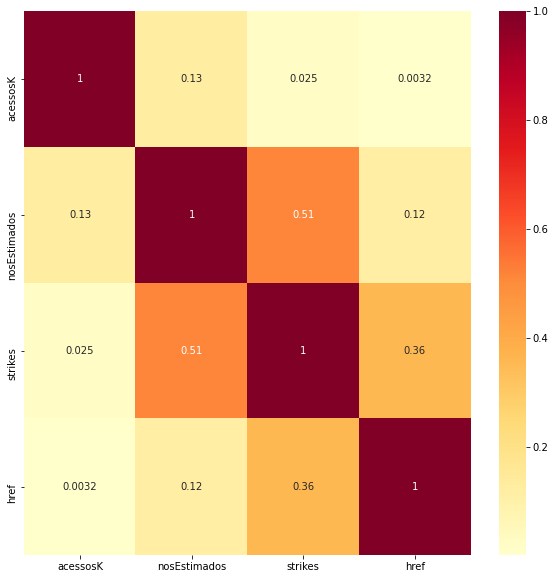

In [74]:
plt.figure(figsize=(10,10))
sns.heatmap(df_porAcessoK[['acessosK','nosEstimados','strikes','href']].corr(method='spearman'), cmap='YlOrRd',annot=True)

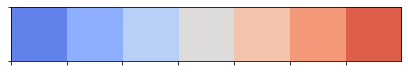

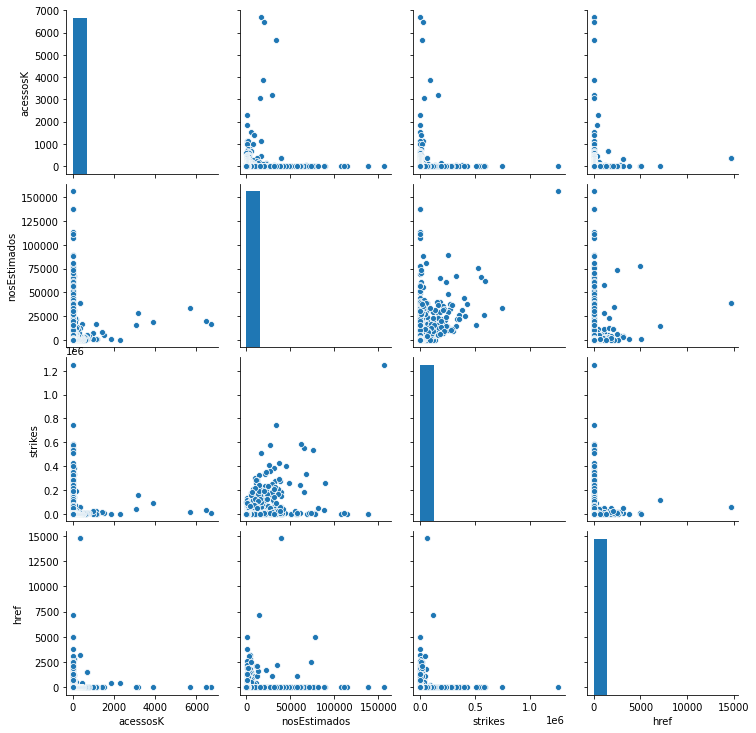

In [76]:
sns.palplot(sns.color_palette("coolwarm",7))
#sns.pairplot(df_normasPlanalto[df_normasPlanalto['compilado']==True])
sns.pairplot(df_porAcessoK[['acessosK','nosEstimados','strikes','href']])


[(0.0, 396.7765499274848)]

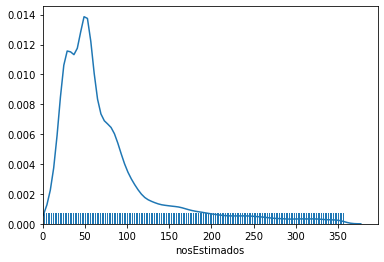

In [98]:
sns.distplot(df_normasPlanalto['nosEstimados'][df_normasPlanalto.nosEstimados < df_normasPlanalto.nosEstimados.quantile(.90)], rug=True, hist=False, bins=100).set(xlim=(0))

In [113]:
df_normasPlanalto[df_normasPlanalto.nosEstimados < df_normasPlanalto.nosEstimados.quantile(.90)].describe()

tamanhoK  acessosK     href  nosEstimados   strikes
count  60073.00  60073.00 60073.00      60073.00  60073.00
mean      10.05      0.26     2.24         76.54    298.95
std       28.41     10.46    22.98         63.15   1219.44
min        0.00      0.00     0.00          2.00      0.00
25%        4.01      0.00     0.00         38.00      0.00
50%        5.21      0.00     0.00         54.00      0.00
75%        9.09      0.00     0.00         88.00    384.00
max     2413.30   2278.71  2648.00        356.00 135120.00

In [80]:
df_porStrike = df_normasPlanalto[df_normasPlanalto.strikes < df_normasPlanalto.strikes.quantile(.90)]
df_porStrike.describe()

contagem  tamanhoK  acessosK  nosEstimados  strikes  col14     href
count  60034.00  60034.00  60034.00      60034.00 60034.00   0.00 60034.00
mean       1.00     31.52      0.73        207.09   139.70    nan     2.29
std        0.00    262.95     32.29       1607.24   256.12    nan    37.42
min        1.00      0.00      0.00          2.00     0.00    nan     0.00
25%        1.00      4.01      0.00         38.00     0.00    nan     0.00
50%        1.00      5.20      0.00         54.00     0.00    nan     0.00
75%        1.00      9.52      0.00         92.00   192.00    nan     0.00
max        1.00  22299.19   6688.17     137784.00  1200.00    nan  5024.00

[(0.0, 1353.5992563492575)]

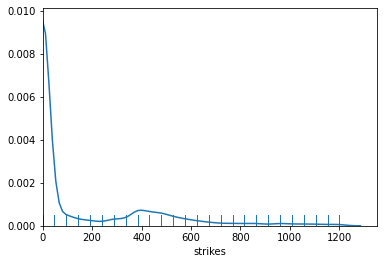

In [81]:
sns.distplot(df_porStrike.strikes, rug=True, hist=False, bins=100).set(xlim=(0))

[(0.0, 47390.986935934314)]

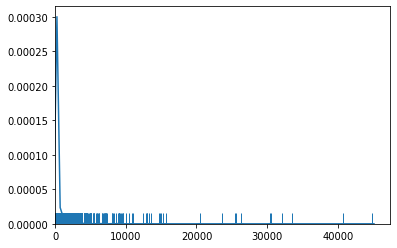

In [82]:
sns.distplot(df_href, rug=True, hist=False, bins=100).set(xlim=(0))

[(0.0, 1076.8389806681519)]

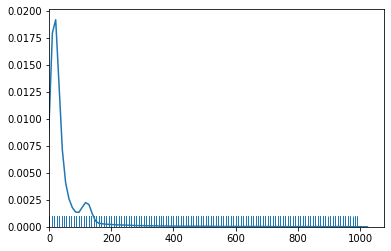

In [83]:
sns.distplot(df_href[df_href['href']<1000], rug=True, hist=False, bins=100).set(xlim=(0))

In [151]:
df_href.describe()

href
count 48409.00
mean     87.59
std     611.72
min       0.00
25%      16.00
50%      24.00
75%      48.00
max   44912.00

In [159]:
df_normasPlanalto[df_normasPlanalto['status'].notnull()].sample(20)

status               tipo  \
norma                                                                          
dnn11360                        poco escuro e genipapeiro            decreto   
dnn11941                                fazenda barreiros            decreto   
dnn11290                   companhia docas do ceara - cdc            decreto   
dnn12375                           fazenda belo horizonte            decreto   
508        apoio a alimentacao escolar na educacao basica  medida provisoria   
dnn12174                                     fazenda arca            decreto   
522                                 acoes de defesa civil  medida provisoria   
dnn11851            rio do peixe dos aguiar e santa maria            decreto   
dnn11483                                   vila sao pedro            decreto   
dnn9221                              radio sao jose ltda.            decreto   
dnn9370                          tv globo de recife ltda.            decreto   
dnn8977                                    fazenda bacuri            decreto   
dnn7980                                           escolas            decreto   
dnn9404                      ii - editora boa vista ltda.            decreto   
dnn10090                         fazenda conjunto vitoria            decreto   
dnn10506                                  engenho altinho            decreto   
dnn9537                   radio difusora torre forte ltda            decreto   
dnn12275        fazenda nova esperanca e nova esperanca i            decreto   
dnn12281                         fazenda agricola coracao            decreto   
dnn9308                            radio selvagem fm ltda            decreto   

          tamanhoK  acessosK  href compilado  nosEstimados  strikes  \
norma                                                                 
dnn11360      7.89      0.00  0.00       NaN         28.00     0.00   
dnn11941      7.42      0.00  0.00       NaN         28.00     0.00   
dnn11290      9.52      0.00  0.00       NaN         42.00     0.00   
dnn12375      7.31      0.00  0.00       NaN         30.00     0.00   
508           5.71      0.00 56.00       NaN         98.00   576.00   
dnn12174      8.34      0.00  0.00       NaN         30.00     0.00   
522          61.84      0.00 48.00       NaN       1182.00  9456.00   
dnn11851      7.66      0.00  0.00       NaN         30.00     0.00   
dnn11483      7.90      0.00  0.00       NaN         28.00     0.00   
dnn9221       7.62      0.00  0.00       NaN        108.00   672.00   
dnn9370       4.35      0.00  0.00       NaN         84.00     0.00   
dnn8977       9.76      0.00  0.00       NaN         96.00     0.00   
dnn7980       3.51      0.00  0.00       NaN         56.00     0.00   
dnn9404       4.35      0.00  0.00       NaN         64.00  1248.00   
dnn10090     10.67      0.00  0.00       NaN         92.00  3456.00   
dnn10506      6.53      0.00  0.00       NaN         36.00     0.00   
dnn9537       7.29      0.00  0.00       NaN        104.00  2208.00   
dnn12275      7.67      0.00  0.00       NaN         30.00     0.00   
dnn12281      8.58      0.00  0.00       NaN         32.00     0.00   
dnn9308       5.23      0.00  0.00       NaN         88.00  1440.00   

         dt_last_modified    hr_last_modified dataAssinatura  \
norma                                                          
dnn11360       2007-10-17 2020-07-16 08:27:00       04/10/07   
dnn11941       2009-02-04 2020-07-16 08:38:00       19/02/09   
dnn11290       2007-09-27 2020-07-16 18:32:00       26/06/07   
dnn12375       2010-11-02 2020-07-16 14:20:00       22/12/09   
508            2012-04-09 2020-07-16 12:42:00       08/10/10   
dnn12174       2010-11-02 2020-07-16 09:48:00       31/08/09   
522            2019-05-28 2020-07-16 14:19:00       12/01/11   
dnn11851       2008-10-12 2020-07-16 07:16:00       27/11/08   
dnn11483       2020-02-18 2020-07-16 17:49:00       22/01/08   
dnn9221        2018-06-

<class 'pandas.core.frame.DataFrame'>
Index: 176 entries,   147 to vila sao pedro
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   status  176 non-null    int64
dtypes: int64(1)
memory usage: 2.8+ KB


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f547dcb6f60>],
      dtype=object)

/home/jef/snap/jupyter/common/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 147 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/jef/snap/jupyter/common/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 148 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/jef/snap/jupyter/common/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 147 missing from current font.
  font.set_text(s, 0, flags=flags)
/home/jef/snap/jupyter/common/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 148 missing from current font.
  font.set_text(s, 0, flags=flags)


<Figure size 1440x1440 with 0 Axes>

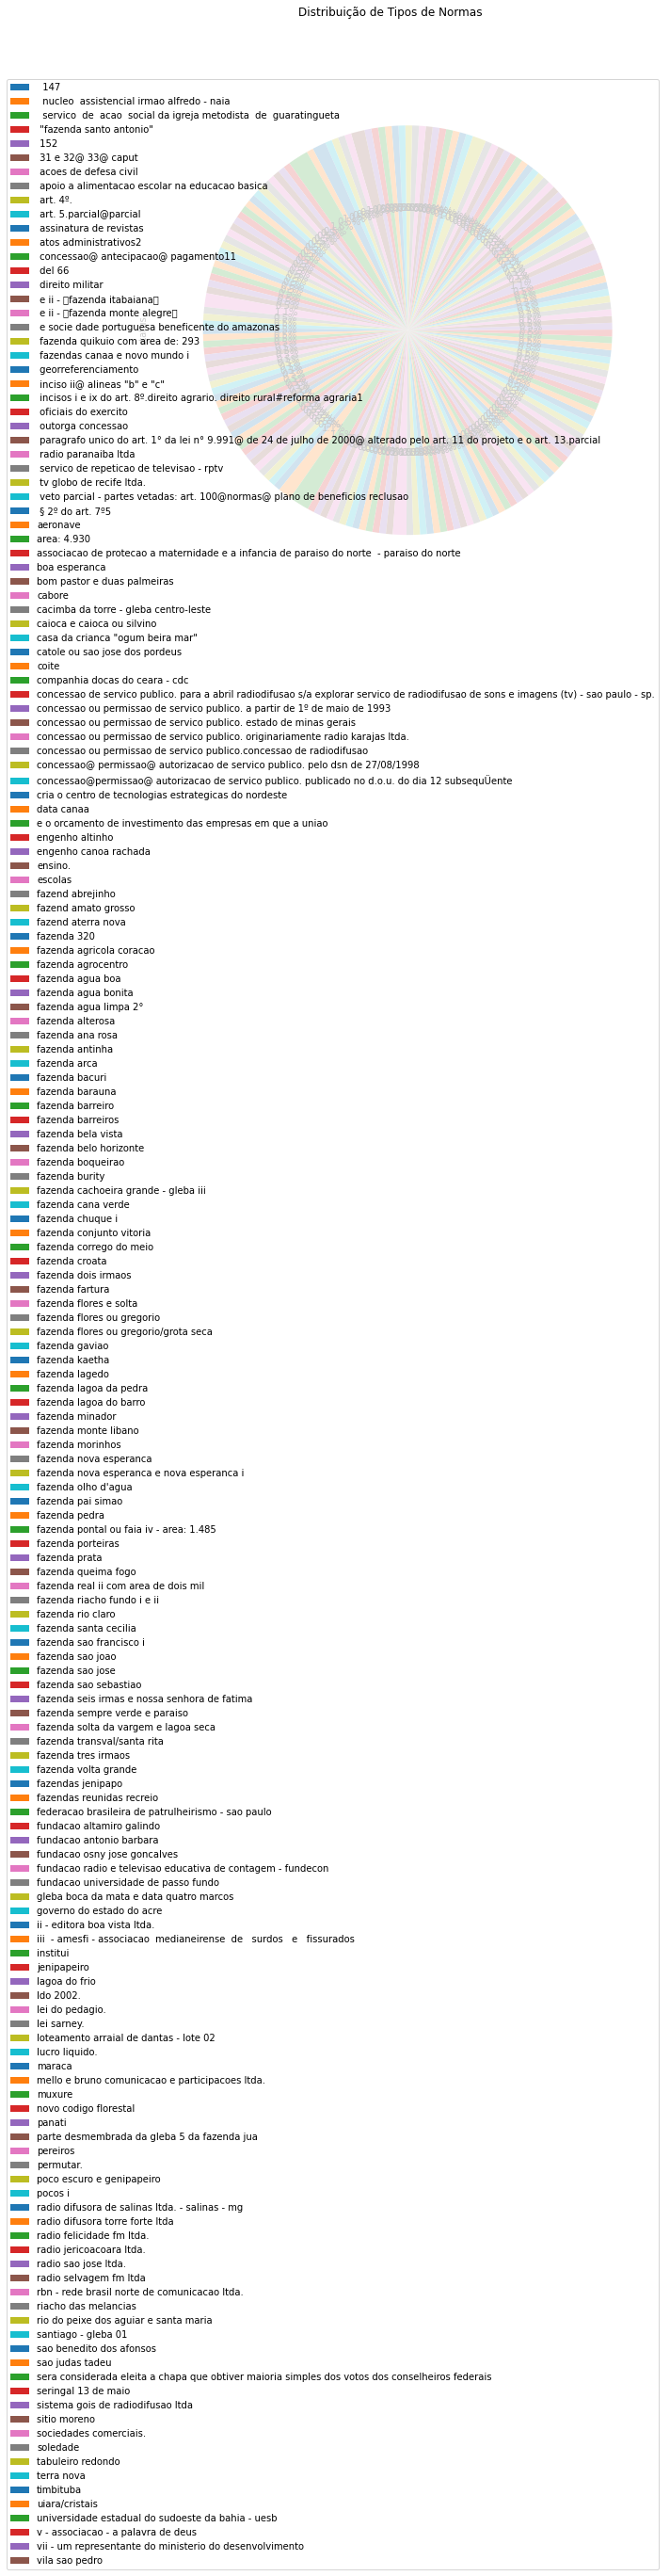

In [157]:
df_distribuicaoStatus

In [ ]:
df_normasPlanalto[df_normasPlanalto['status'].notnull()].count()

<class 'pandas.core.frame.DataFrame'>
Index: 10 entries, dec - decreto to pagina=1&amp
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   tipo    10 non-null     int64
dtypes: int64(1)
memory usage: 160.0+ bytes


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f547d0dd400>],
      dtype=object)

<Figure size 1440x1440 with 0 Axes>

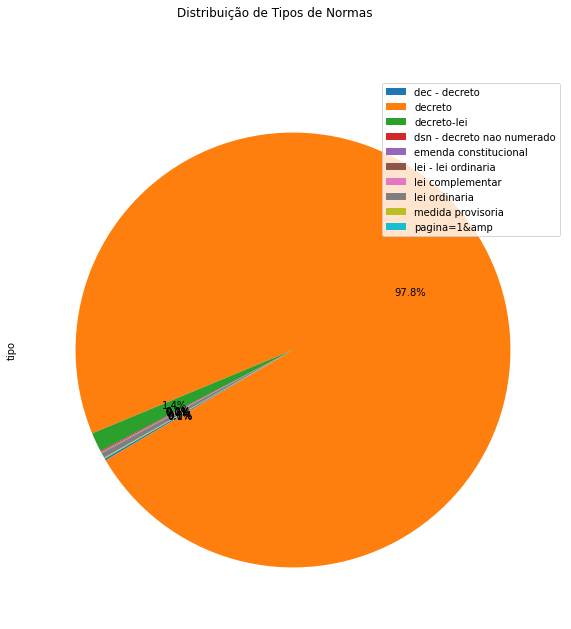

In [147]:
df_distribuicaoTipos = df_normasPlanalto.groupby(['tipo'])[['tipo']].agg('count')
df_distribuicaoTipos.info()
plt.figure(figsize=(20,20))
df_distribuicaoTipos.plot.pie(y='tipo',title="Distribuição de Tipos de Normas", 
                              legend=True, figsize=(20,10), startangle=210, autopct='%1.1f%%', subplots=True, labeldistance=None
                             )


In [116]:
df_normasPlanalto[df_normasPlanalto['tipo'].notnull()].count()

status                187
tipo                 5066
tamanhoK             5066
acessosK             5066
href                 5066
compilado              22
nosEstimados         5066
strikes              5066
dt_last_modified     5066
hr_last_modified     5066
dataAssinatura       5066
dataPublicacaoDOU    5066
cod_situacao_ato     5066
cod_assinante         411
identificacao        5066
assunto2             4984
tipo3                 191
dtype: int64

[(0.0, 1715.1860831325685)]

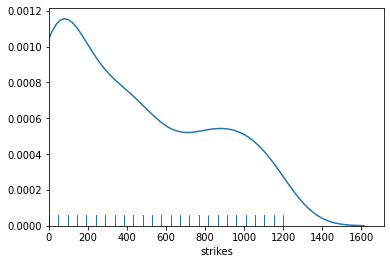

In [85]:
sns.distplot(df_porStrike[df_porStrike['compilado']==True].strikes, rug=True, hist=False, bins=100).set(xlim=(0))

In [86]:
df_normasPlanalto[df_normasPlanalto['compilado']==True]['contagem'].count()

418

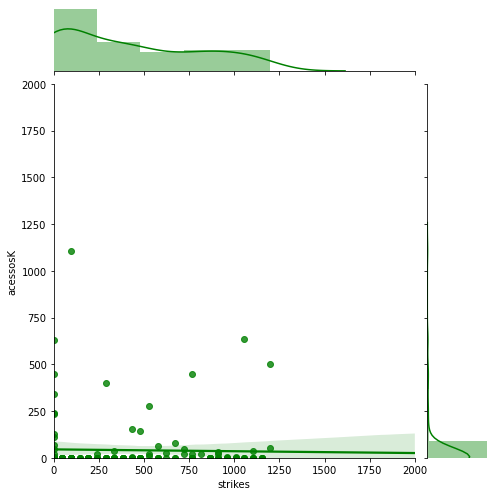

In [87]:
g = sns.jointplot("strikes", "acessosK", data=df_porStrike[df_porStrike['compilado'] == True],
                  kind="reg", truncate=False,
                  xlim=(0, 2000), ylim=(0, 2000),
                  color="g", height=7)

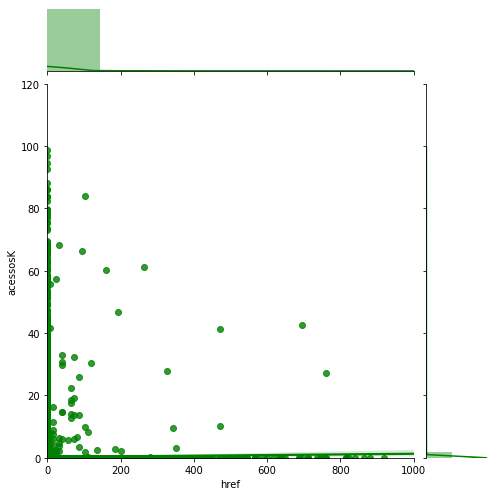

In [88]:
g = sns.jointplot("href", "acessosK", data=df_normasPlanalto[df_normasPlanalto['acessosK']<100],
                  kind="reg", truncate=False,
                  xlim=(0, 1000), ylim=(0, 120),
                  color="g", height=7)

[(1.0, 7041.2081191892585), (0.0, 0.007838934316092571)]

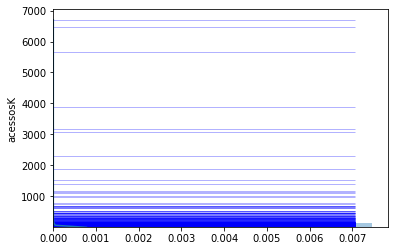

In [149]:
sns.distplot(df_porAcessoK.acessosK, rug=True, rug_kws={"color": "b", "alpha":0.3, "linewidth": 1, "height":0.9 }, 
             kde=True, hist=True, bins=50, vertical=True
            ).set(xlim=(0), ylim=(1))


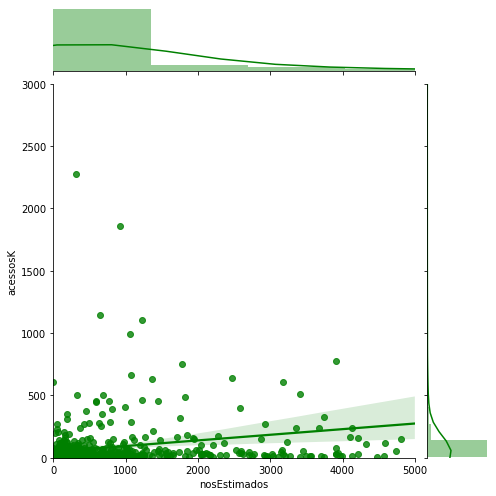

In [90]:
g = sns.jointplot("nosEstimados", "acessosK", data=df_porAcessoK[df_porAcessoK['acessosK']>6],
                  kind="reg", truncate=False,
                  xlim=(0, 5000), ylim=(0, 3000),
                  color="g", height=7)

In [93]:
df_temp = df_normasPlanalto.drop('col13', axis=1)
df_temp = df_temp.drop('col14', axis=1)
df_temp = df_temp.drop('contagem', axis=1)
df_normasPlanalto = df_temp 
df_normasPlanalto = df_normasPlanalto[['status','tipo','tamanhoK','acessosK','href','compilado','nosEstimados','strikes','dt_last_modified','hr_last_modified','dataAssinatura','dataPublicacaoDOU','cod_situacao_ato','cod_assinante','identificacao','assunto2','tipo3']]

In [94]:
df_normasPlanalto.info()

#Contar os atributos não nulos no  normas no 99.9% percentil 
df_porAcessoK.count()

<class 'pandas.core.frame.DataFrame'>
Index: 66761 entries, constituicao to vep-377
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   status             187 non-null    object        
 1   tipo               5066 non-null   object        
 2   tamanhoK           66761 non-null  float64       
 3   acessosK           66761 non-null  float64       
 4   href               66761 non-null  float64       
 5   compilado          418 non-null    object        
 6   nosEstimados       66761 non-null  float64       
 7   strikes            66761 non-null  float64       
 8   dt_last_modified   66324 non-null  datetime64[ns]
 9   hr_last_modified   66324 non-null  datetime64[ns]
 10  dataAssinatura     5066 non-null   object        
 11  dataPublicacaoDOU  5066 non-null   object        
 12  cod_situacao_ato   5066 non-null   object        
 13  cod_assinante      411 non-null    object        
 14

contagem             67171
dt_last_modified     66405
hr_last_modified     66405
tamanhoK             67171
acessosK             67171
compilado              418
nosEstimados         67171
strikes              67171
dataPublicacaoDOU     5066
dataAssinatura        5066
cod_situacao_ato      5066
cod_assinante          411
cod_orig              5065
status                 187
identificacao         5066
assunto2              4984
assunto3              3293
tipo                  5066
assunto               4875
tipo3                  191
col13                  195
col14                    0
href                 67171
dtype: int64

In [95]:
df_normasPlanalto.to_csv("_normasPlanalto.csv", header=True, index=True, sep = ';')

In [96]:
df_href_uniq.to_csv("_href_uniq.csv", header=True, index=True, sep = ';')